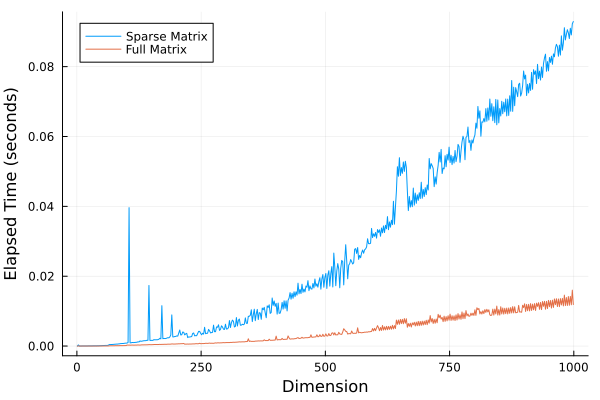

In [1]:
using LinearAlgebra
using BenchmarkTools
using Plots
using SparseArrays
using LinearSolve

function solve_and_write_time(n)
    # Generate a random square matrix of size n
    matrix = sprand(n, n, 1.)

    # Generate a random vector of size n
    vector = randn(n)
    ret = zeros(2)

    # Measure the time to solve the linear system
    elapsed_time_sparse = @elapsed begin
        x = matrix \ vector
    end
    ret[1] = elapsed_time_sparse

    matrix = Matrix(matrix)
    elapsed_time_full = @elapsed begin
        x = matrix \ vector
    end
    ret[2] = elapsed_time_full

    return ret
end

# Set the dimensions for the loop (e.g., from 1 to 1000 with a step of 2)
dimensions = 1:2:1000
times_sparse = []
times_full = []

# Solve linear systems and collect elapsed times
for n in dimensions
    time = solve_and_write_time(n)
    push!(times_sparse, time[1])
    push!(times_full, time[2])
end

# Plot the graph
plot(dimensions, times_sparse, xlabel="Dimension", ylabel="Elapsed Time (seconds)", label="Sparse Matrix", legend=:topleft)
plot!(dimensions, times_full, label="Full Matrix")